<a href="https://colab.research.google.com/github/jee9894/DeepLearningStudy/blob/master/%EB%8B%A8%EC%9D%BC%EC%B8%B5_%EC%8B%A0%EA%B2%BD%EB%A7%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from sklearn.datasets import load_breast_cancer

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
import matplotlib.pyplot as plt
import numpy as np

In [0]:
# 유방암 데이터 Bunch클래스 생성
# 양성 샘플 : 악성 종양
# 음성 샘플 : 양성 종양
cancer = load_breast_cancer()

In [0]:
x = cancer.data
y = cancer.target

In [0]:
# 훈련세트와 테스트세트로 나눔
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.2, random_state=42)

In [0]:
class SingleLayer:
  def __init__(self):
    self.w = None
    self.b = None
    self.losses = []

  # 직선 방정식 계산
  def forpass(self, x):
    z = np.sum(x * self.w) + self.b
    return z

  # 그레디언트 계산
  def backprop(self, x, err):
    w_grad = x * err
    b_grad = 1 * err
    return w_grad, b_grad

  # 행렬의 맨 앞에 1로 채워진 열 벡터 추가
  def add_bias(self, x):
    return np.c_[np.ones((x.shape[0], 1)), x]

  # 활성화 함수(시그모이드 함수) 적용하여 반환
  def activation(self, z):
    # np.exp는 수학적으로 안전하지 못하여 작은수나 큰수를 clip
    z = np.clip(z, -100, None)
    a = 1 / (1 + np.exp(-z))
    return a

  def fit(self, x, y, epoch = 100):
    self.w = np.ones(x.shape[1])
    self.b = 0
    for i in range(epoch):
      loss = 0
      # 인덱스를 섞음
      indexs = np.random.permutation(np.arange(len(x)))
      for i in indexs:
        z = self.forpass(x[i])
        a = self.activation(z)
        err = -(y[i] - a)
        w_grad, b_grad = self.backprop(x[i], err)  
        self.w -= w_grad
        self.b -= b_grad
        a = np.clip(a, 1e-10, 1-1e-10)
        # 에포크마다 평균 손실 저장
        loss += -(y[i]*np.log(a)+(1-y[i])*np.log(1-a))
      
      self.losses.append(loss/len(y))
  
  # 예측치 y^를 알기위한 메소드 
  def predict(self, x):
    z = [self.forpass(x_i) for x_i in x]
    return np.array(z) > 0

  # 정확도 계산
  def score(self, x, y):
    return np.mean(self.predict(x) == y)

In [16]:
layer = SingleLayer()
layer.fit(x_train, y_train)
layer.score(x_test, y_test)

0.9210526315789473

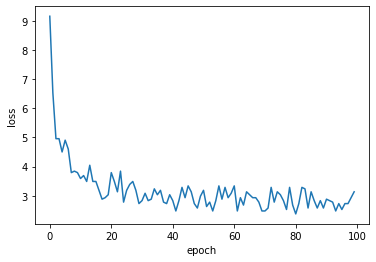

In [17]:
plt.plot(layer.losses)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [0]:
from sklearn.linear_model import SGDClassifier

In [0]:
sgd = SGDClassifier(loss = 'log', max_iter=100, tol=1e-3, random_state=42)

In [20]:
sgd.fit(x_train, y_train)
sgd.score(x_test, y_test)

0.8333333333333334

In [21]:
sgd.predict(x_test[:10])

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 0])

In [22]:
y_test[:10]

array([0, 1, 0, 1, 0, 1, 1, 0, 0, 0])